In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


array([<AxesSubplot:ylabel='None'>], dtype=object)

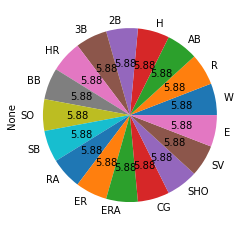

In [4]:
df.count().plot.pie(subplots=True,autopct='%.2f',radius=1)

In [5]:
df.isin([0]).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [6]:
#basic info about dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


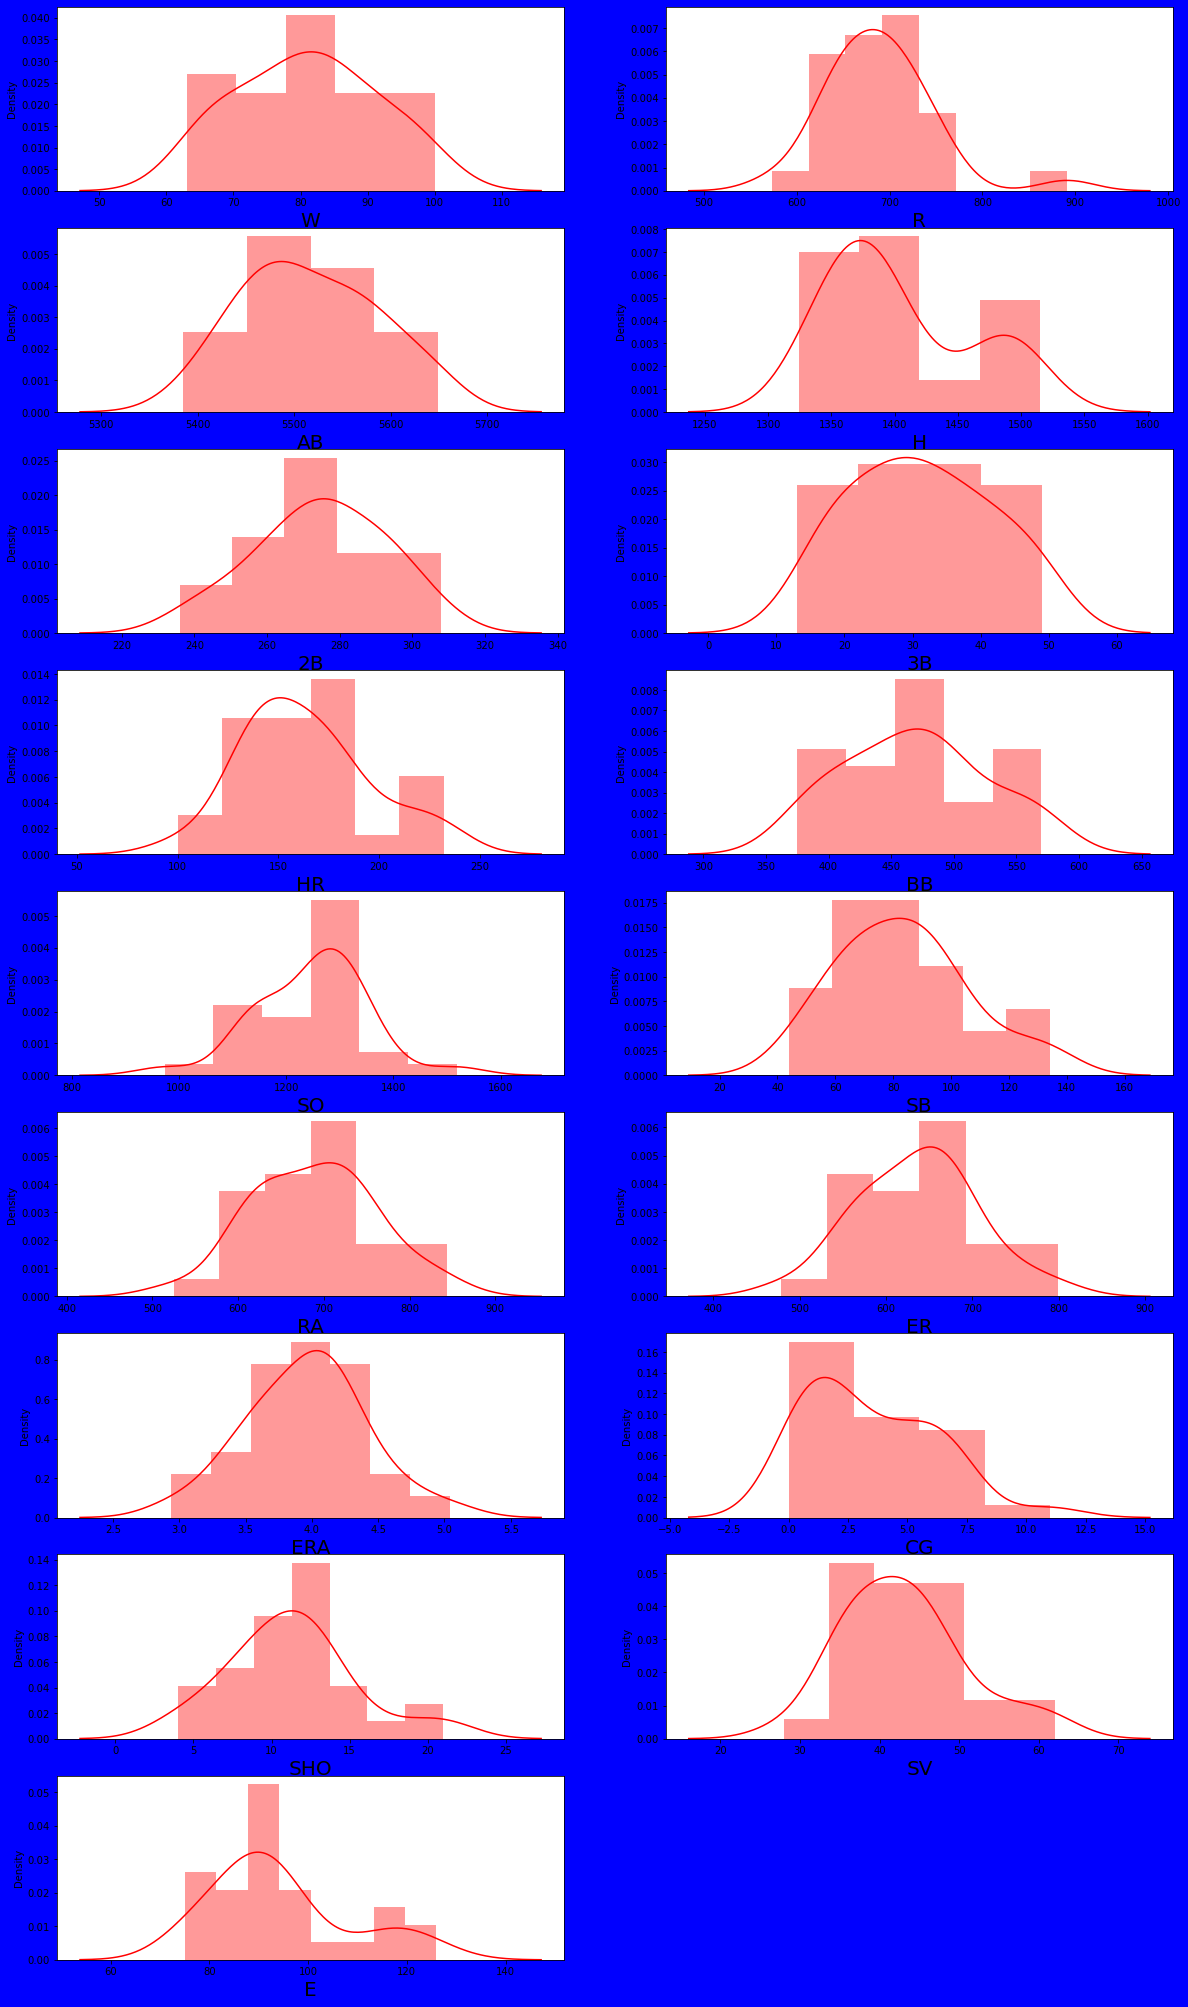

In [7]:
#univariate analysis
plt.figure(figsize=(20,40),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=19:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(x=df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

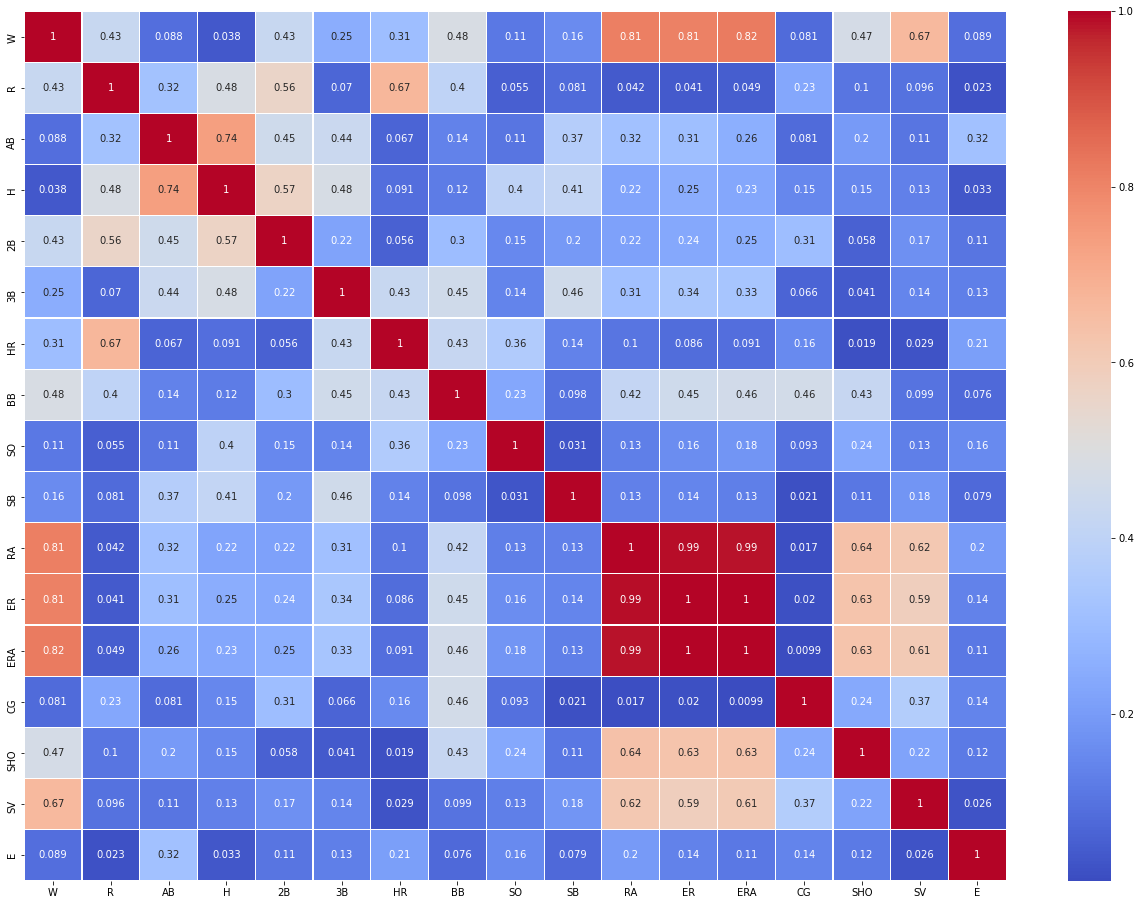

In [8]:
#multivariate analysis
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,cmap='coolwarm',annot=True,fmt=".2g",linewidths=.2)
plt.show

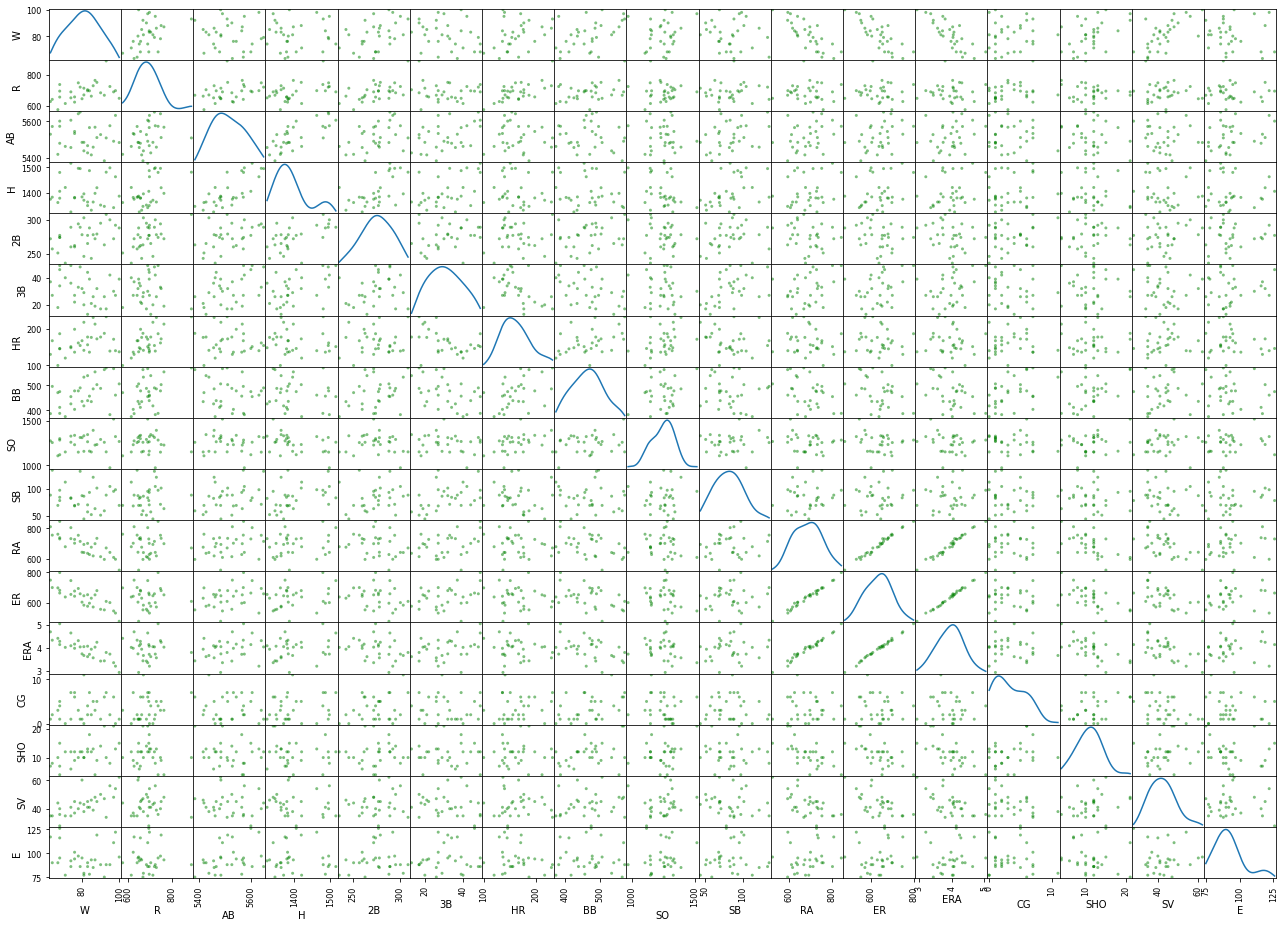

In [9]:
#for checking corr 
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(22,16),diagonal='kde',color='g') 
plt.show()

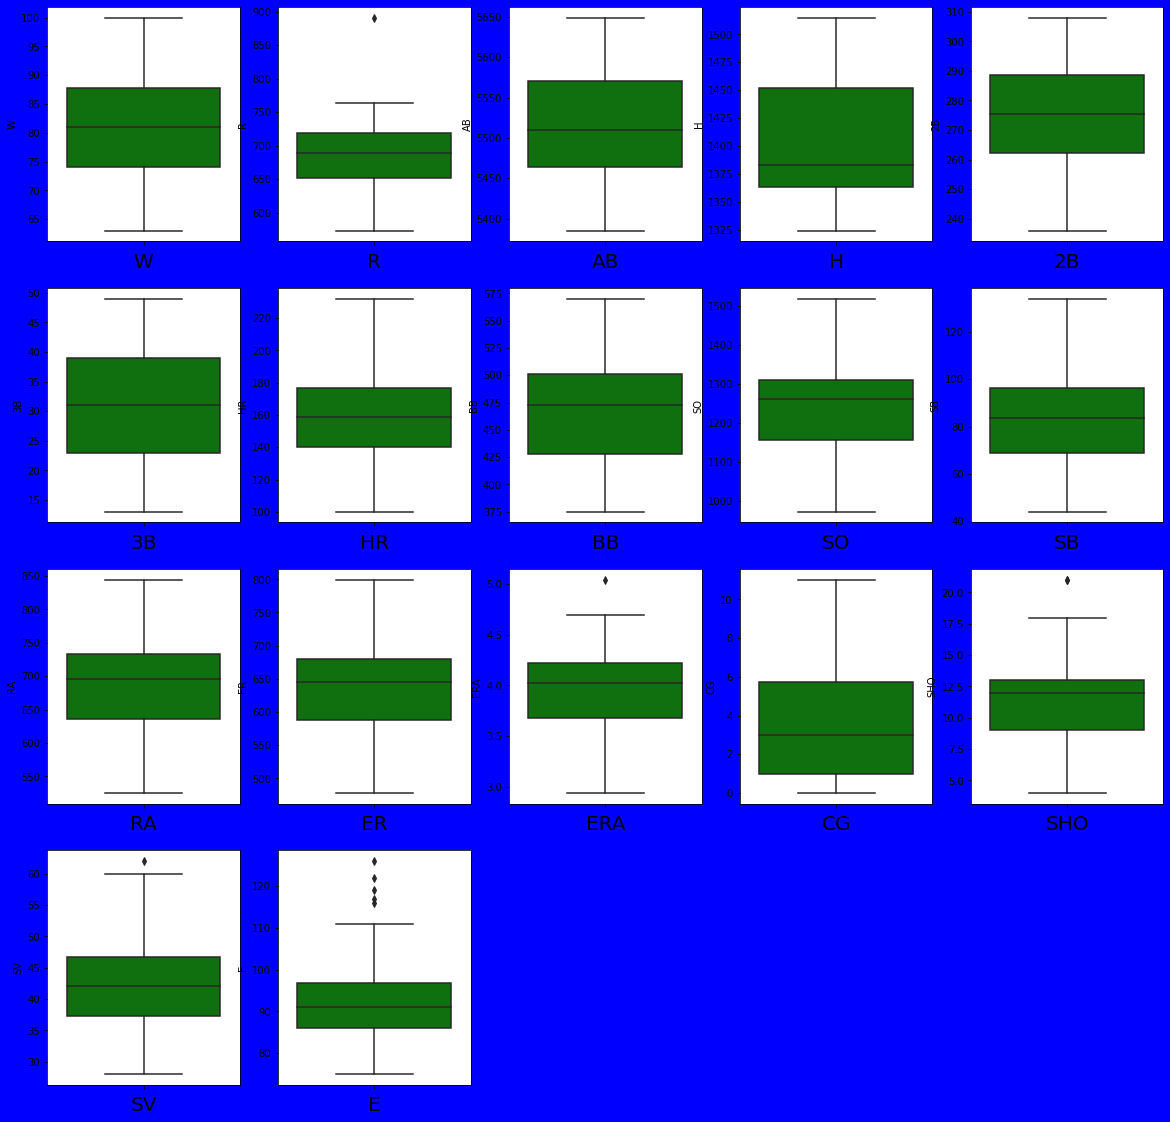

In [10]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=19:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=df[column],orient='v',color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
#for removing outliers
z_score=zscore(df[["R","ERA","SHO","SV","E"]])
ab=np.abs(z_score)
filtered=((ab<3).all(axis=1))
new_df = df[filtered]
new_df.shape


(29, 17)

In [12]:
#for removing outliers
data= new_df[new_df["SHO"]< new_df["SHO"].quantile(0.99)]

data= new_df[new_df["E"]< new_df["E"].quantile(0.97)]
data= new_df[new_df["SV"]< new_df["SV"].quantile(0.96)]

In [13]:
# i can afford to loose only this much data
data.shape

(27, 17)

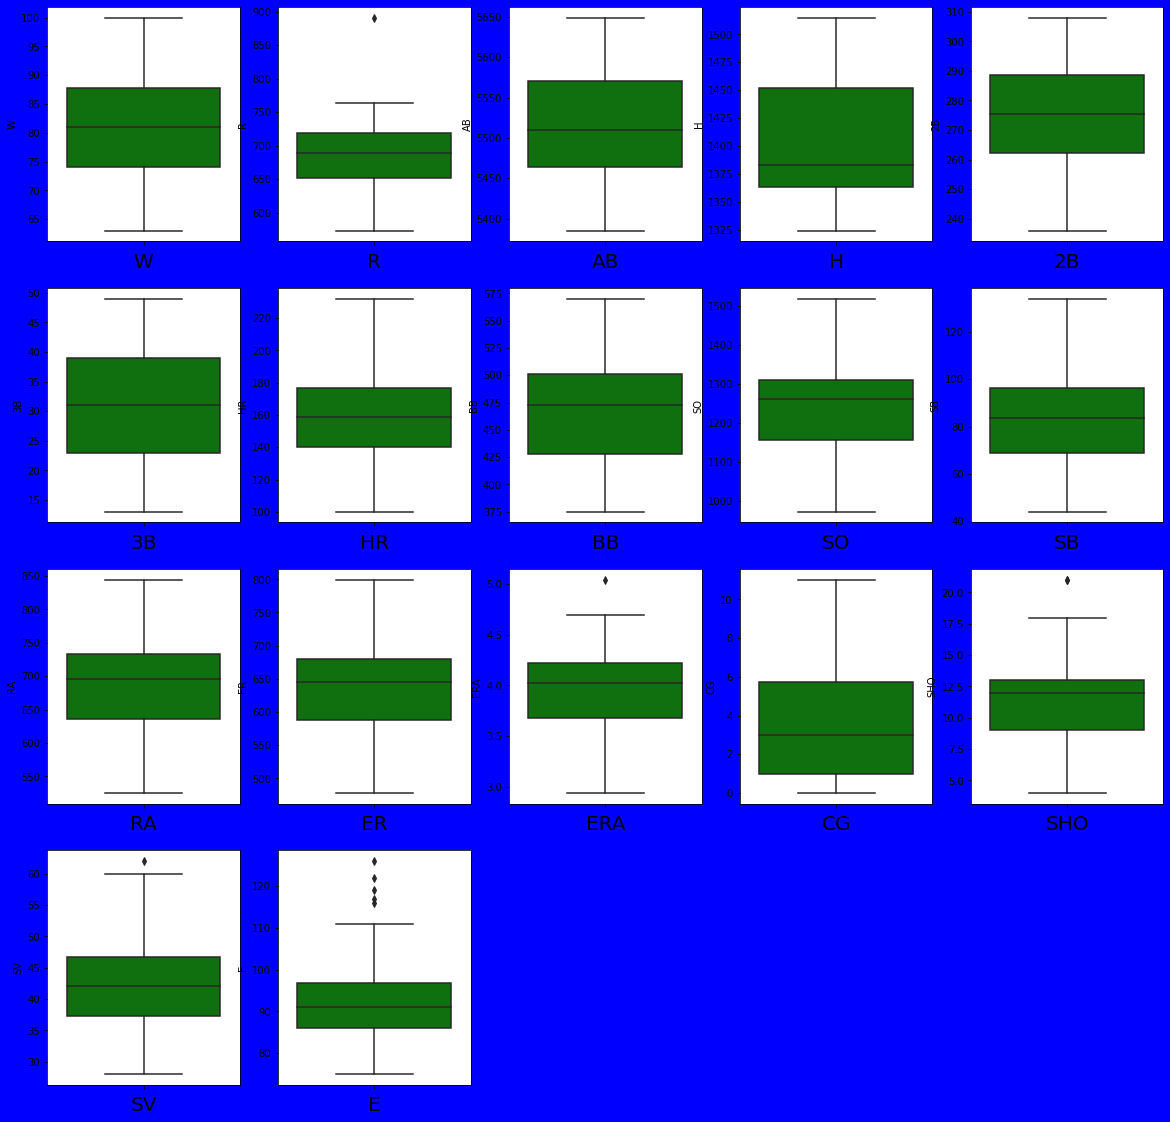

In [14]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=19:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=df[column],orient='v',color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
data.skew()

W      0.067216
R     -0.372171
AB     0.070822
H      0.701246
2B    -0.234676
3B     0.160811
HR     0.401983
BB     0.166958
SO    -0.155054
SB     0.445608
RA     0.248827
ER     0.252056
ERA    0.237337
CG     0.750727
SHO    0.628940
SV     0.148113
E      0.830160
dtype: float64

In [16]:
#for removing skewness
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [17]:
features=["R","HR","CG","SHO","SV","E"]

In [18]:
data[features]=scale.fit_transform(data[features].values)
data[features].head()

,R,HR,CG,SHO,SV,E
0,0.891664,-0.748675,-0.404476,-0.721304,2.155533,-0.309452
1,0.210289,-0.134274,-0.404476,0.288372,0.489302,-0.497662
2,-0.395936,-0.673543,2.046164,-0.190205,-0.641217,-1.271069
3,-1.338234,-0.862917,1.215594,-0.448190,-0.808082,0.656743
4,0.048412,-0.309504,1.215594,0.288372,-1.146308,-0.497662


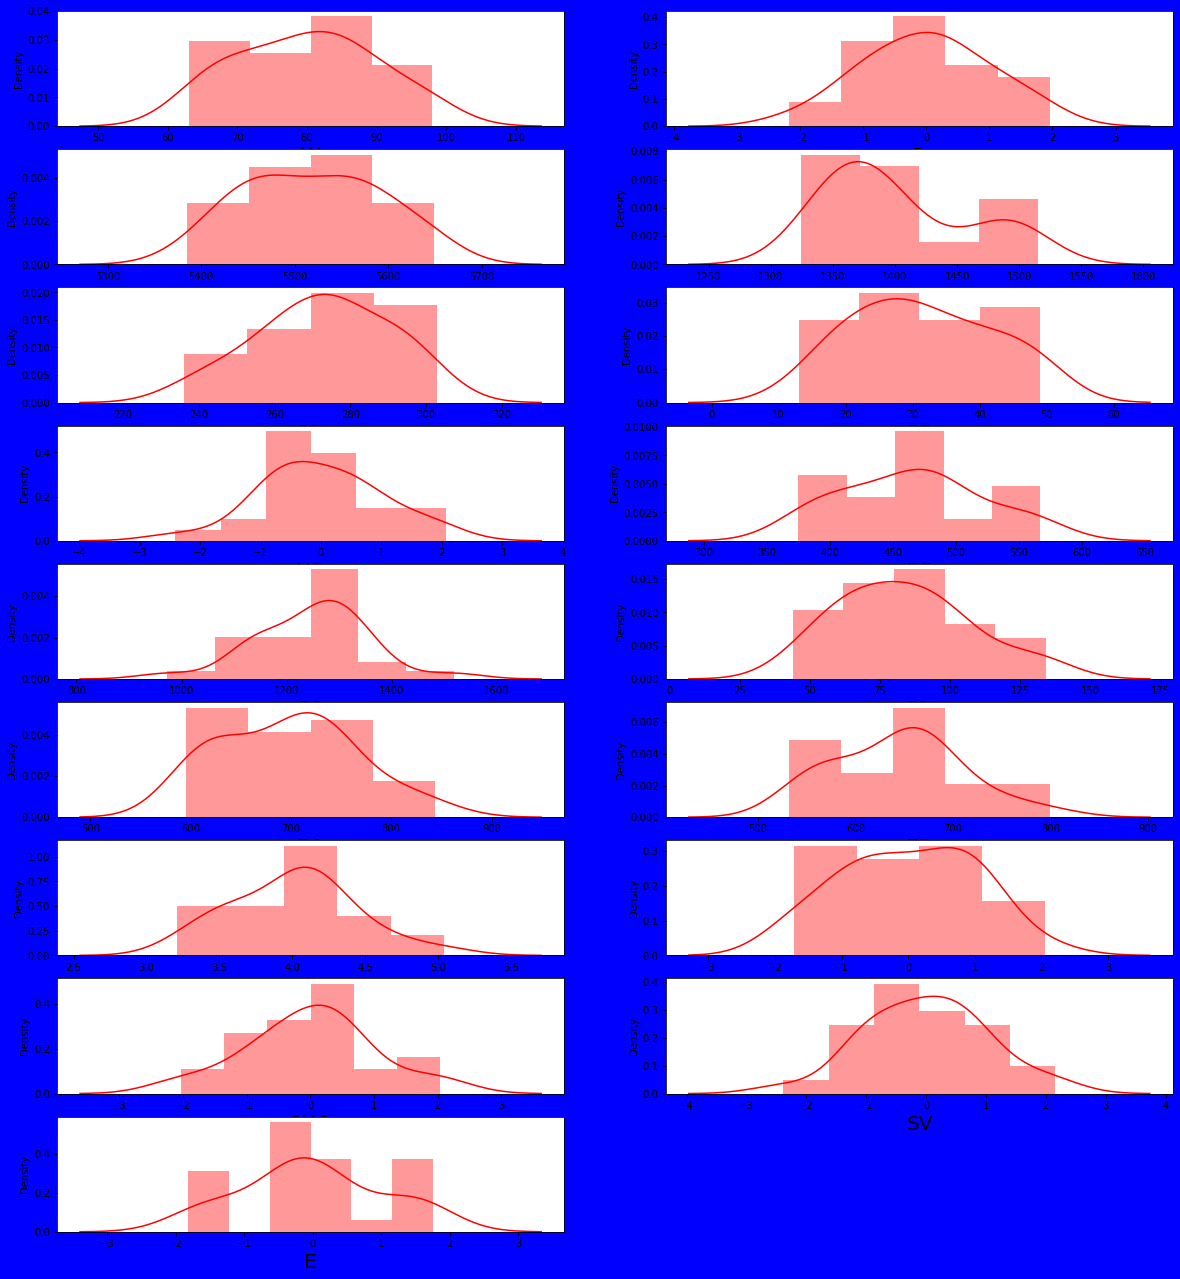

In [19]:
#using dist plot to see skewness 
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in data:
    if plotnumber<=19:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [20]:
data.skew()

W      0.067216
R     -0.037877
AB     0.070822
H      0.701246
2B    -0.234676
3B     0.160811
HR    -0.000817
BB     0.166958
SO    -0.155054
SB     0.445608
RA     0.248827
ER     0.252056
ERA    0.237337
CG    -0.070116
SHO   -0.000971
SV    -0.001549
E      0.087949
dtype: float64

In [21]:
x_new=data.drop("W",axis=1)
y_new=data["W"]

In [22]:
#for selecting best column
from sklearn.feature_selection import chi2,SelectPercentile,f_classif
s=SelectPercentile(score_func=f_classif,percentile=70)
f_values=s.fit(x_new,y_new)

In [23]:
cols=s.get_support(indices=True)
features=x_new.columns[cols]


In [24]:
df_score=pd.DataFrame({"features":x_new.columns,"s_score":s.scores_})

In [25]:
df_score.sort_values(by="s_score",ascending=False)

,features,s_score
15,E,4.870742
8,SB,3.553558
0,R,2.444371
9,RA,2.149334
1,AB,1.752944
14,SV,1.669696
7,SO,1.646730
11,ERA,1.479357
10,ER,1.391160
13,SHO,1.017147


In [26]:
x=data[["SB","E","R","RA","SV","AB"]]
y=data['W']

# model building

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

In [28]:
#using standard scaler to scale dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [29]:
x_scaled.shape

(27, 6)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=50)

# linear regression

In [31]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=linear.predict(x_test)

In [33]:
r2_score(y_test,y_pred)

0.8596481990929596

In [34]:
cross_val_score(linear,x_scaled,y,cv=3).mean()

0.8052405439422986

# gbdt

In [35]:
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [36]:
y_pred=gd.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.6680869142596129

In [38]:
cross_val_score(gd,x_scaled,y,cv=3).mean()

0.2174187177191662

# xgbdt

In [39]:
xg =XGBRegressor ()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred=xg.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.6001168446032125

In [42]:
cross_val_score(xg,x_scaled,y,cv=3).mean()

0.1673068470917515

# ridge

In [43]:
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [44]:
y_pred=r.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.8658623073654664

In [46]:
cross_val_score(r,x_scaled,y,cv=3).mean()

0.8117399874446164

# ridge  is my best model

In [47]:
grid_params= {"alpha":[0,1,2,4],
              "random_state":[0,10,15,20,40],
              "fit_intercept":[True,False],
              "normalize":[True,False]
}

In [48]:
grid_search = GridSearchCV(estimator = r,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 4], 'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'random_state': [0, 10, 15, 20, 40]})

In [50]:
grid_search.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 0}

In [56]:
r=Ridge(alpha=1,fit_intercept=True,normalize=False,random_state=0)
r.fit(x_train,y_train)

Ridge(alpha=1, random_state=0)

In [57]:
y_pred=r.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.8658623073654664

In [59]:
cross_val_score(r,x_scaled,y,cv=3).mean()

0.8117399874446164

# saving model

In [60]:
import pickle
filename='baseball.pk1'
pickle.dump(xg,open(filename,'wb'))